# Datan analysointi K2019 - kerta 5

<a href="#1">Datan visualisointi- matplotlib</a>  
<a href="#2">Useita kaavioita</a>  
<a href="#3">Groupby:sta kaavio</a>  
<a href="#4">Muita kaaviotyyppejä</a>  
<a href="#5">Histogrammi</a>  
<a href="#6">Seaborn-kirjasto</a>  
<a href="#7">countplot</a>  
<a href="#8">factorplot</a>  
<a href="#9">barplot</a>  
<a href="#10">distplot</a>  
<a href="#11">boxplot</a>  
<a href="#12">swarmplot</a>  
<a href="#13">violiplot</a>  
<a href="#14">regplot, joinplot</a>  
<a href="#15">pairplot</a>  
<a href="#16">Kuvioiden koko ja tallentaminen</a>  


<a id="1"></a>
## Datan visualisointi- matplotlib
Kuvaajien luomiseen käytetään yleensä **matplotlib** -kirjastoa, ja sen **pyplot**-moduulia, joka antaa MATLAB-tyyppisen rajapinnan. Vakiintuneen käytännön mukaan tämä tuodaan käyttäen aliasta **plt**:

`import matplotlib.pyplot as plt`

[matplotlib.pyplot API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

Pythonille on myös monia muita visualisointikirjastoja, mutta suurin osa näistä pohjautuu matplotlibiin. Toinen usein käytetty kirjasto on **seaborn**.

Vaikka seaborn.kirjastoa ei käyttäisikään kaavioiden luontiin, sen tuominen muokkaa matplotlibin oletustyylejä pyrkien luettavuuteen, joten se kannattaa tuoda komennolla  
`import seaborn as sns`

Alla `plt.plot`-funktio luo kaavion (oletuksena viivakaavio) ja `plt.show()` "tulostaa" sen näytölle.


   satunnaisluvut
0        0.537737
1        0.414840
2       -1.836625
3       -0.041341
4       -0.421492
5        0.658889
6        0.881126
7        2.406570
8       -0.091810
9       -0.404786


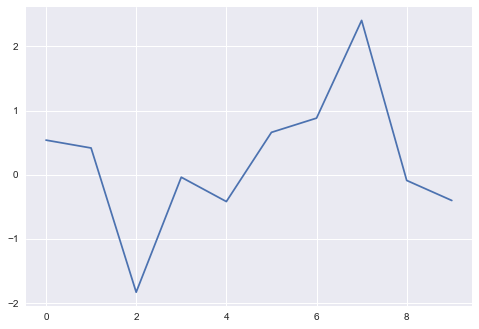

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame({'satunnaisluvut' : np.random.randn(10)})
print(df)

plt.plot(df)
plt.show()


Tässä voidaan käyttää myös toisenlaista syntaksia, jossa kutsutaan DataFramen `plot`-metodia. Tämäkin käyttää `matplotlib.pyplot`:ia.

   satunnaisluvut
0       -0.167229
1       -1.394502
2        0.094280
3       -0.292960
4        0.090165
5        1.051817
6       -0.654268
7        0.359796
8       -0.835405
9       -0.486289


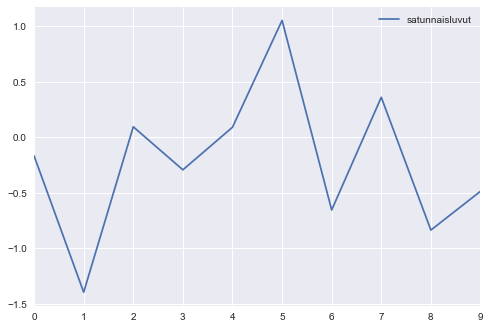

In [276]:
df = pd.DataFrame({'satunnaisluvut' : np.random.randn(10)})
print(df)

df.plot()
plt.show()

Myös kolmas syntaksi on käytössä:

   satunnaisluvut
0        0.991074
1        0.975723
2        0.537168
3        1.313845
4       -0.094106
5        0.938042
6       -0.134774
7       -1.246434
8       -1.198275
9       -0.693746


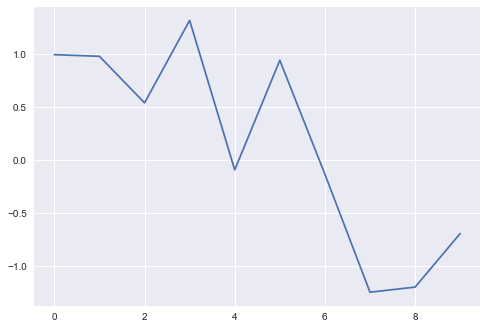

In [277]:
df = pd.DataFrame({'satunnaisluvut' : np.random.randn(10)})
print(df)

plt.plot('satunnaisluvut', data=df)  # data-paratmetrilla käytettävä DataFrame
plt.show()

Usein Jupyterissä määritellään kaaviot näytettäväksi automaattisesti ilman `plt.show()`-kutsua. Tämä onnistuu ajamalla Notebookissa kerran komento  
`%matplotlib inline`  
jonka jälkeen kaavio tulostuu jo `plot`-komennolla. 

Toinen tapa on ajaa komento  
`%matplotlib notebook`  
jolloin Jupyterin kaavioihin saa interaktiivisen näkymän.

`plt.plot` siis piirtää viivakaavion. Jos parametrina annetaan DataFrame, sen indeksi tulee vaaka-akselille, ja jokainen (numeerinen) sarake piirretään omana arvosarjanaan.


    satunnaisluvut    toinen
0        -1.319656 -0.800723
1         0.499367  0.838503
4         0.745464  1.072389
9        -0.676896 -0.854811
16        0.341303  0.613602
25       -2.209388 -2.325385
36        0.146084  0.245140
49       -0.883406 -0.836708
64       -2.194483 -1.725958
81        0.365971 -0.039227


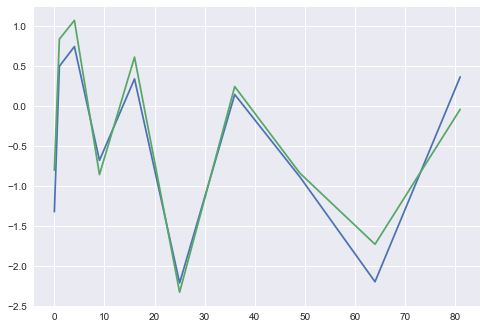

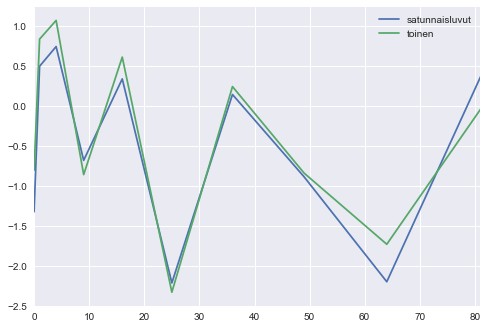

In [252]:
df = pd.DataFrame({'satunnaisluvut' : np.random.randn(10)})
df['toinen'] = df['satunnaisluvut'] + np.random.randn(10)/3
df.set_index(np.arange(0,10)**2, inplace = True)
print(df)

plt.plot(df)
plt.show()

# tapa2

df.plot()
plt.show()


Voidaan antaa myös erikseen x- ja y-akselien arvot:

   vuosi  lumi
0   1959    63
1   1960    41
2   1961    52
3   1962    41
4   1963    29


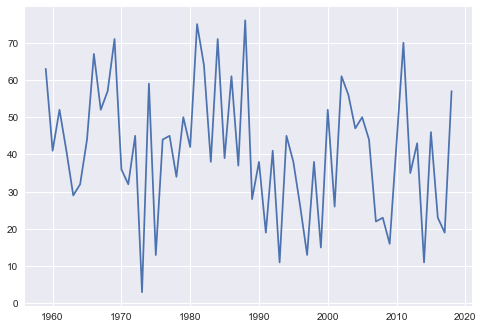

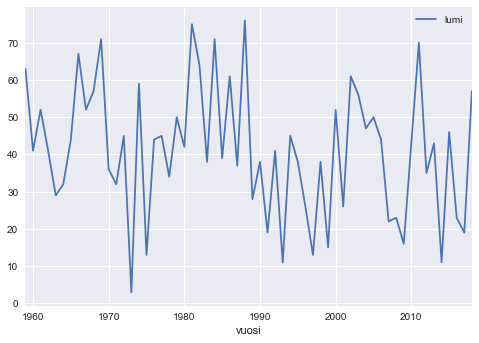

In [253]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim1.txt')
print(df.head())

plt.plot(df['vuosi'], df['lumi'])  # 1. parametri x, toinen y
plt.show()

# tapa2
df.plot('vuosi', 'lumi')  # 1. parametri x, toinen y
plt.show()


   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


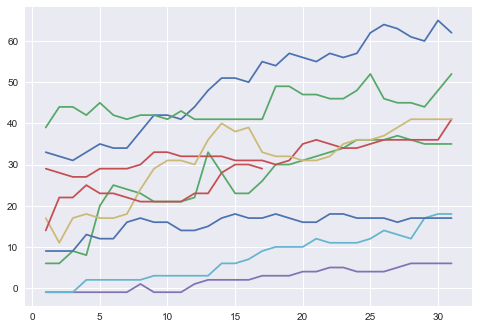

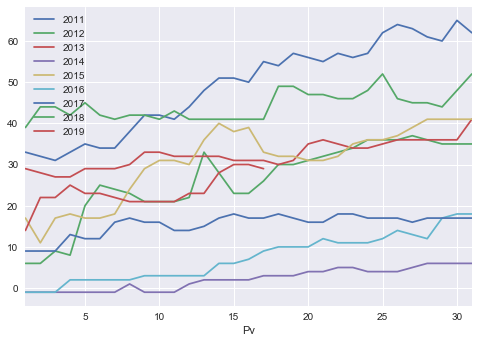

In [258]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())

plt.plot(df['Pv'],df.iloc[:,1:]) # tässä Pv-sarake kaikilla x:nä ja muut sarakkeet y:tä
plt.show()

# tapa2

df.plot('Pv',['2011','2012','2013','2014','2015','2016','2017','2018','2019']) # tässä Pv-sarake kaikilla x:nä ja muut sarakkeet y:tä
plt.show()


Kolmantena parametrina voi antaa muotoilukomennon, joka on lyhyessä muodossa `[color][marker][line]`. Esim. 'k-.' tarkoittaa mustaa viiva-piste -viivaa:

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


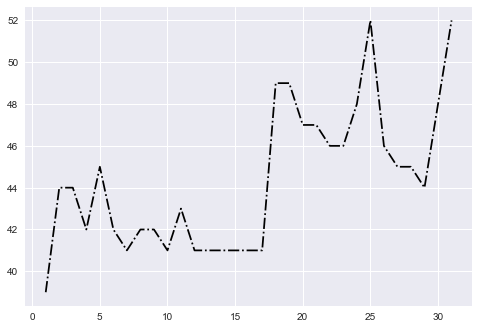

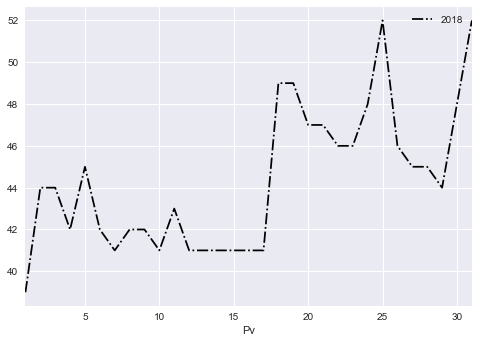

In [260]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())

plt.plot(df['Pv'],df['2018'], 'k-.') 
plt.show()

#tapa2

df.plot('Pv','2018', style='k-.') 
plt.show()


Muotoilukomentojen speksit löytyy [API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) :n kohdasta Notes.

Jos arvosarjoja on useampia, ja niille halutaan eri muotoilut, annetaan parametrit 1-tavassa x,y,muotoilu -kolmikkoina, 2-tavassa style-parametriin listana.

Usein akselien otsikot ovat tärkeitä selittäviä tekijöitä, ne saadaan metodelilla `xlabel`, `ylabel`.  Koko kaavion otsikko tulee metodilla `title` ja selitteen saa näkyviin metodilla `legend`.  2-tavalla  selite tulee automaattisesti.

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


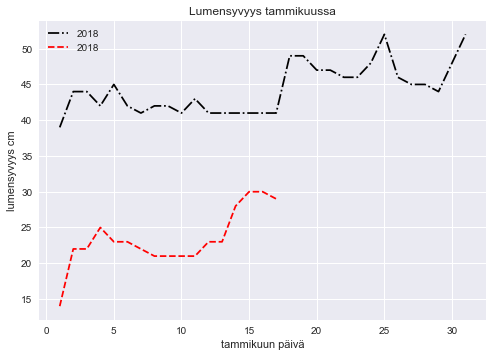

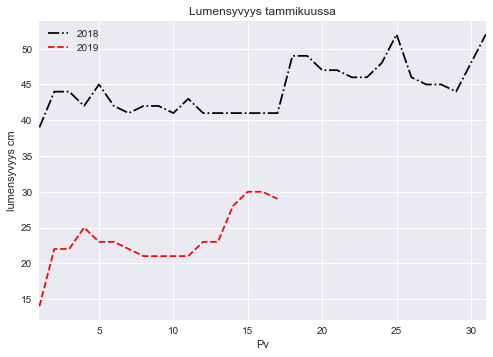

In [266]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())

plt.plot(df['Pv'],df['2018'], 'k-.', df['Pv'],df['2019'], 'r--') # tässä Pv-sarake kaikilla x:nä ja muut sarakkeet y:tä
plt.xlabel('tammikuun päivä')
plt.ylabel('lumensyvyys cm')
plt.title('Lumensyvyys tammikuussa')
plt.legend()
plt.show()

# tapa2, legend tulee automaattisesti

df.plot('Pv',['2018', '2019'], style=['k-.','r--'])   

plt.ylabel('lumensyvyys cm')
plt.title('Lumensyvyys tammikuussa')

plt.show()


Tässä nähtiin että 1-tavassa selitteeseen tulee väärin otsikko toiselle viivalle (2018), eli matplotlib ei onnistunut automaattisessa määrityksessä. Selitteeseen tulevat otsikot voi luetella `legend`-metodissa.

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


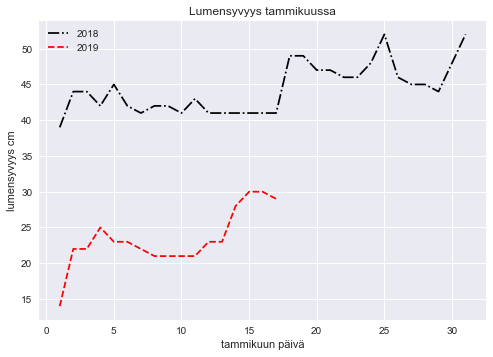

In [272]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())

plt.plot(df['Pv'],df['2018'], 'k-.', df['Pv'],df['2019'], 'r--') # tässä Pv-sarake kaikilla x:nä ja muut sarakkeet y:tä
plt.xlabel('tammikuun päivä')
plt.ylabel('lumensyvyys cm')
plt.title('Lumensyvyys tammikuussa')
plt.legend([2018,2019])
plt.show()


Jo luotuun kaavioon voidaan myös tehdä uusia arvosarjoja ja määrittää otsikko samalla `label`-parametrilla:

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


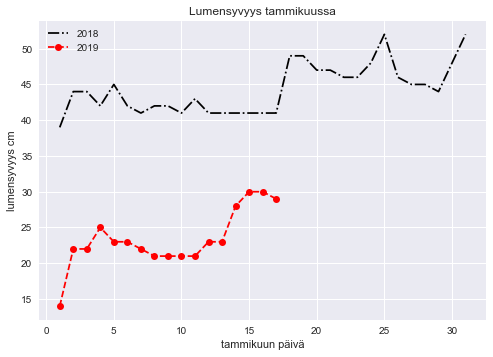

In [273]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())

plt.plot(df['Pv'],df['2018'], 'k-.', label=2018)
plt.plot(df['Pv'],df['2019'], 'ro--', label=2019)  # ro-- lisää pyöreät markerit

plt.xlabel('tammikuun päivä')
plt.ylabel('lumensyvyys cm')
plt.title('Lumensyvyys tammikuussa')
plt.legend()
plt.show()



2-tavalla nämä tulevat eri kaavioihin:

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


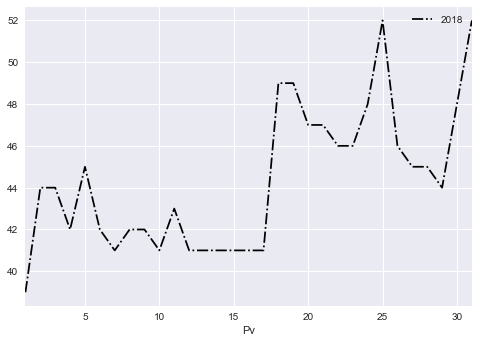

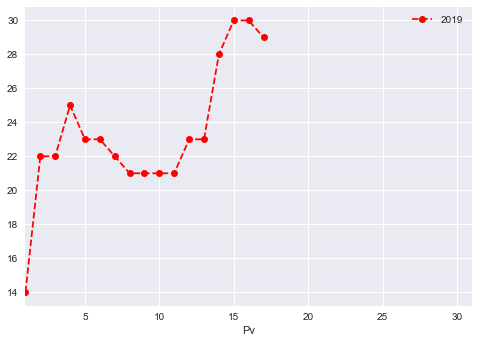

In [274]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())


# tapa2

df.plot('Pv','2018', style='k-.')
df.plot('Pv','2019', style='ro--')  # ro-- lisää pyöreät markerit
plt.show()

Samaan kaavioon ne saa nappaamalla df.plotin palauttaman Axes-tyyppisen objektin ja antamalla se toisen df.plotin ax-parametrina. Alempana enemmän Axes-objektista.

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


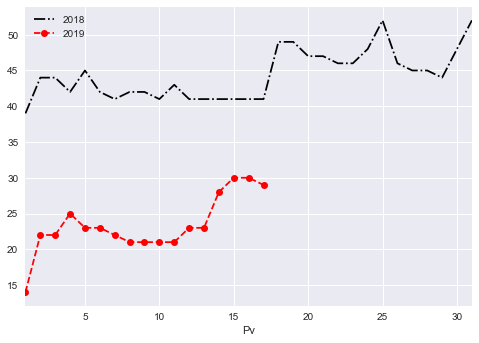

In [330]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())


# tapa2

ax1 = df.plot('Pv','2018', style='k-.')
df.plot('Pv','2019', style='ro--', ax=ax1)  # ro-- lisää pyöreät markerit
plt.show()

Eri kaavion osia voidaan muototoilla lähes rajattomasti:
![osat](https://matplotlib.org/_images/anatomy.png)

<a id="2"></a>
## Useita kaavioita
pyplotin konsepti perustuu *nykyisen kuvion* ja *nykyisen kaavion* idealle: kaikki plt.- metodit tehdään nykyiselle kaaviolle, joka sijaitsee nykyisessä kuviossa.
* `figure` kuvio, jossa voi olla useampia kaavioita
* `axes` kaavio (joka sijaitsee aina jossain kuviossa). Ei tarkoita akselia (=axis)

Jos piirretään vain yksi kaavio ei näistä tarvitse välittää, vaan kuviot ja niiden kaaviot luodaan "pellin alla".


Mutta voidaan myös piirtää useita kaavioita samaan kuvioon:

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


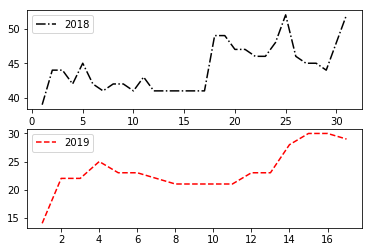

In [94]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())



plt.figure()  # luodaan uusi kuvio, tämä on "nykyinen kuvio". Turha, koska kuvio tulee aina myös automaattisesti
plt.subplot(2,1,1)  # tehdään nykyiseen kuvioon 2 riviä, 1 sarake -"ruudukko" ja otetaan 1. paikka "nykyiseksi kaavioksi"
plt.plot(df['Pv'],df['2018'], 'k-.', label=2018) # piirretään "nykyiseen kaavioon"
plt.legend() # lisätään selite "nykyiseen kaavioon"
plt.subplot(2,1,2) # otetaan "nykyisen kuvion" 2. paikka "nykyiseksi kaavioksi" 
plt.plot(df['Pv'],df['2019'], 'r--', label=2019)# piirretään "nykyiseen kaavioon"
plt.legend() # lisätään selite "nykyiseen kaavioon"
plt.show() # näytetään nykyinen kuvio

`plt.subplot(2,1,1)` -merkinnässä voidaan myös käyttää yhtä parametria 211, jos luvut ovat <10

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


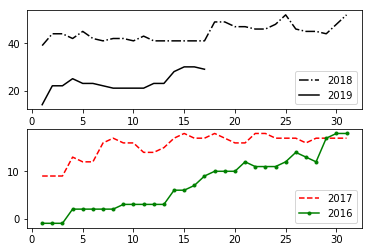

In [110]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())



plt.figure()  # luodaan uusi kuvio, tämä on "nykyinen kuvio". Turha, koska kuvio tulee aina myös automaattisesti
plt.subplot(211)  # tehdään nykyiseen kuvioon 2 riviä, 1 sarake -"ruudukko" ja otetaan 1. paikka "nykyiseksi kaavioksi"
plt.plot(df['Pv'],df['2018'], 'k-.', label=2018) # piirretään "nykyiseen kaavioon"
plt.legend() # lisätään selite "nykyiseen kaavioon"
plt.subplot(212) # otetaan "nykyisen kuvion" 2. paikka "nykyiseksi kaavioksi" 
plt.plot(df['Pv'],df['2017'], 'r--', label=2017)# piirretään "nykyiseen kaavioon"
plt.plot(df['Pv'],df['2016'], 'g.-', label=2016)# piirretään "nykyiseen kaavioon"
plt.legend() # lisätään selite "nykyiseen kaavioon"

plt.subplot(211)  # vaihdetaan takaisin 1. kaavioon
plt.plot(df['Pv'],df['2019'], 'k-', label=2019) # piirretään "nykyiseen kaavioon"
plt.legend()
plt.show() # näytetään nykyinen kuvio

Jos halutaan useampia kuvioita, annetaan plt.figure -funktiolle luku, jolla kuvioon voi palata:

   Pv  2011  2012  2013  2014  2015  2016  2017  2018  2019
0   1  33.0   6.0  29.0  -1.0  17.0  -1.0   9.0  39.0  14.0
1   2  32.0   6.0  28.0  -1.0  11.0  -1.0   9.0  44.0  22.0
2   3  31.0   9.0  27.0  -1.0  17.0  -1.0   9.0  44.0  22.0
3   4  33.0   8.0  27.0  -1.0  18.0   2.0  13.0  42.0  25.0
4   5  35.0  20.0  29.0  -1.0  17.0   2.0  12.0  45.0  23.0


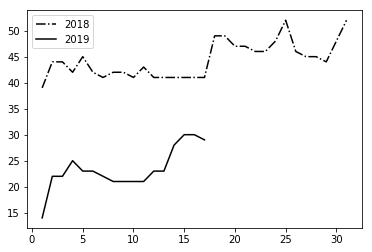

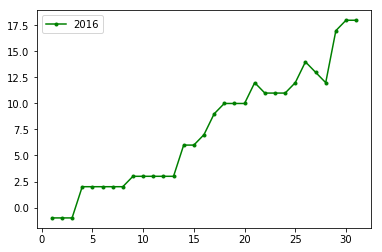

In [112]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')
print(df.head())



plt.figure(1)  
plt.plot(df['Pv'],df['2018'], 'k-.', label=2018) 
plt.legend() 

plt.figure(2)  
plt.plot(df['Pv'],df['2016'], 'g.-', label=2016)
plt.legend() 

plt.figure(1)
plt.plot(df['Pv'],df['2019'], 'k-', label=2019)
plt.legend() 

plt.show()

<a id="3"></a>
### Groupby:sta kaavio
Myös GroupBy-objektille voi kutsua plot-metodia, oletuksena tulee tällöin oma kaavio jokaiselle ryhmitykselle. 



    Vuosi  Joukkue  Sija
0    2011      JYP     4
1    2012      JYP     1
2    2013      JYP     3
3    2014      JYP     5
4    2015      JYP     3
5    2016      JYP     4
6    2017      JYP     3
7    2018      JYP     5
8    2017  Jukurit    11
9    2018  Jukurit    13
10   2011  Jokerit     7
11   2012  Jokerit     3
12   2013  Jokerit     5
13   2014  Jokerit     9
14   2011   Kärpät    10
15   2012   Kärpät     8
16   2013   Kärpät     9
17   2014   Kärpät     1
18   2015   Kärpät     1
19   2016   Kärpät     3
20   2017   Kärpät    10
21   2018   Kärpät     1


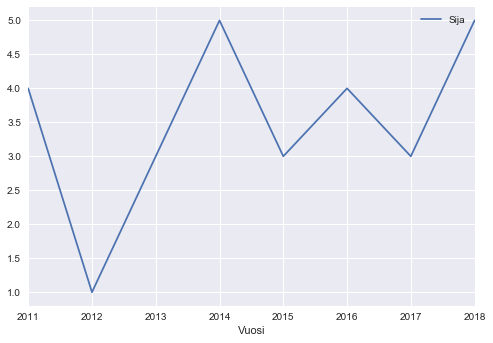

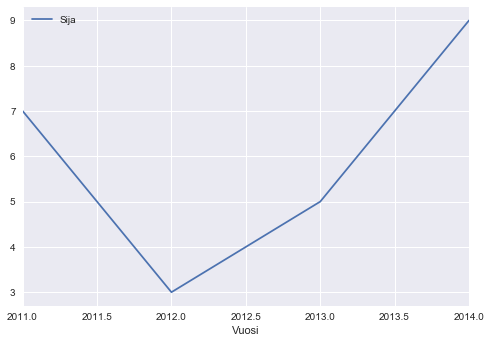

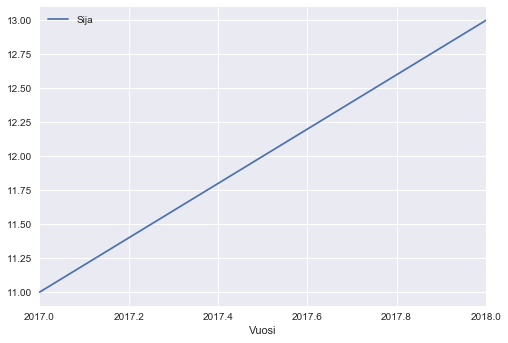

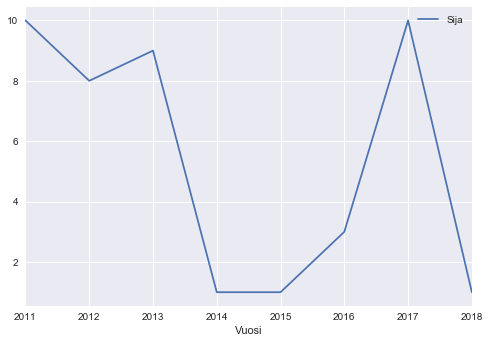

In [321]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta4/esim1.txt')
print(df)

df.groupby('Joukkue').plot('Vuosi', 'Sija')
plt.show()




Samaan kaavion saadan nämä tallentamalla muuttujaan plt:n antama "nykyinen kaavio"-objekti ja antamalla se plot:n ax-parametrina:

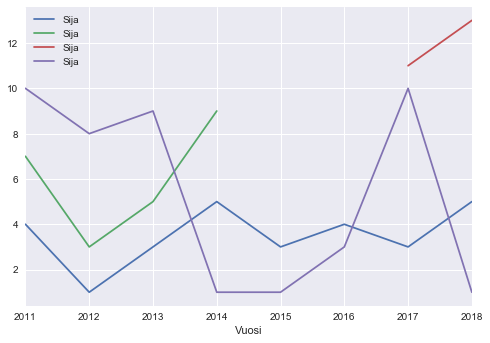

In [320]:

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta4/esim1.txt')

fig1, ax1 = plt.subplots()

df.groupby('Joukkue').plot('Vuosi', 'Sija', ax=ax1)
plt.show()


<a id="4"></a>
## Muita kaaviotyyppejä
`plot` tekee siis viivakaavion, muita kaaviotyyppejä saa mm. funktioilla
* `bar` pylväskaavio
* `barh` palkkikaavio, eli vaakasuora pylväskaavio
* `pie` piirakkakaavio
* `scatter` pistekaavio, jossa pisteiden koko ja väri voi vaihdella
* `hist` histogrammi eli jakauma luokittain

[Esimerkkejä](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py)

Palataan taas Titanic-dataan ja lasketaan jotain koonteja:

1    216
2    184
3    491
Name: Pclass, dtype: int64


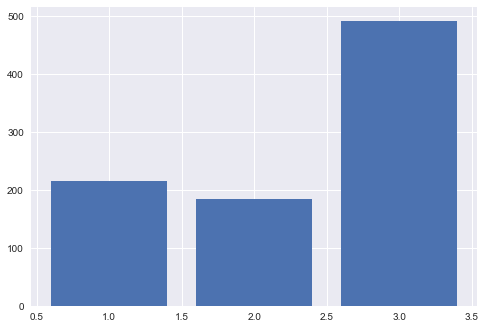

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


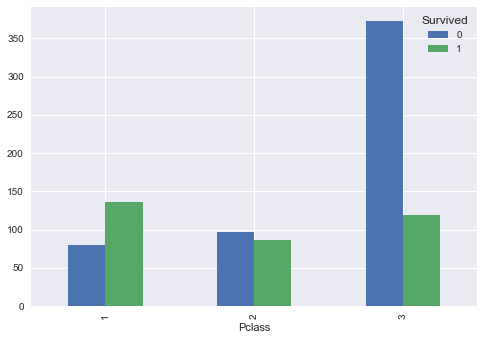

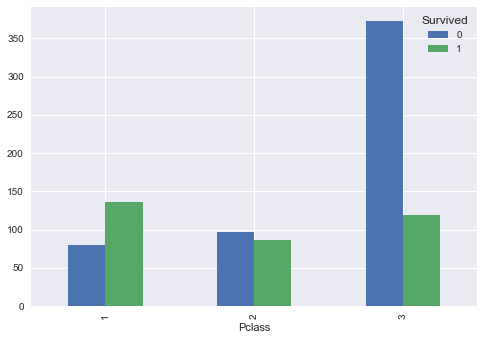

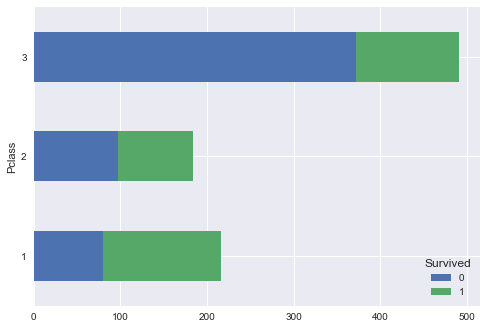

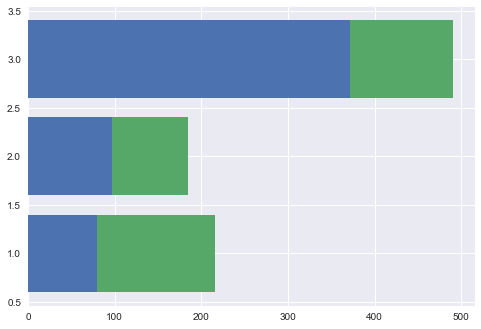

In [322]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta3/titanic.csv', index_col=0)


df2 = df['Pclass'].value_counts(sort=False)
print(df2)

plt.bar(df2.index, df2)  #tai df2.plot.bar(), joka on usein helpompi jos DataFramen indeksissä on "järkevät arvot"
plt.show()

df3 = pd.crosstab(df['Pclass'], df['Survived'])

print(df3)

df3.plot.bar()

plt.show()

# toinen tapa samaan asiaan

df3.plot(kind='bar')

plt.show()



df3.plot.barh(stacked = True)

plt.show()

# tapa2

plt.barh(df3.index, df3[0]) # luokka-akselin arvot, pylväiden korkeudet (tässä "pituudet")
plt.barh(df3.index, df3[1], left = df3[0])  # left kertoo mistä kohdista palkit alkaa, näin saadaan pinottu kaavio

plt.show()

Esimerkki piirakkakaaviosta:


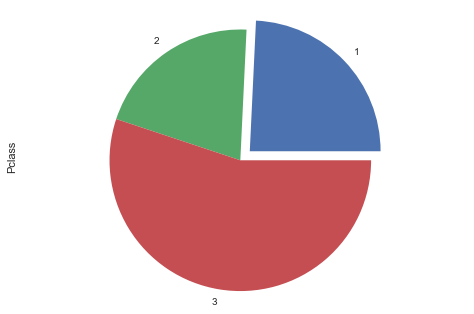

In [298]:
df4 = df['Pclass'].value_counts(sort=False)



df4.plot.pie(explode = [0.1,0,0])

plt.axis('equal') # tämä tekee ympyrän, muuten tulee ellipsi
plt.show()

<a id="5"></a>
## Histogrammi
Histogrammin voi tehdä suoraan alkuperäisestä aineistosta. Eri luokkiin kuuluvia arvoja ei siis tarvitse laskea erikseen DataFramessa.  

Density tekee saman "jatkuvaksi jakaumaksi".

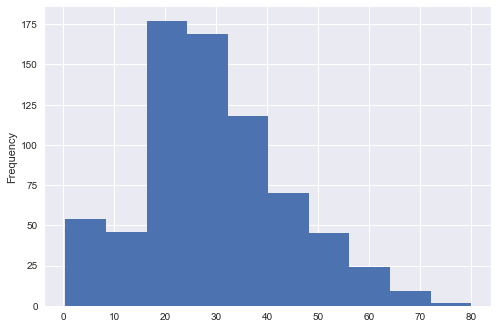

In [297]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta3/titanic.csv', index_col=0)

df['Age'].plot.hist()  # tässä luokat määritellään automaattisesti
plt.show()

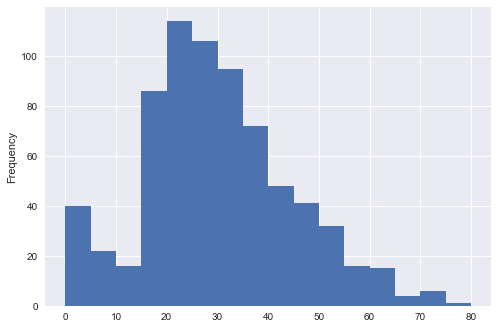

In [296]:
df['Age'].plot.hist(bins=np.arange(0,85,5)) # luokat annettu listana [0,5,10.,..,80]
plt.show()

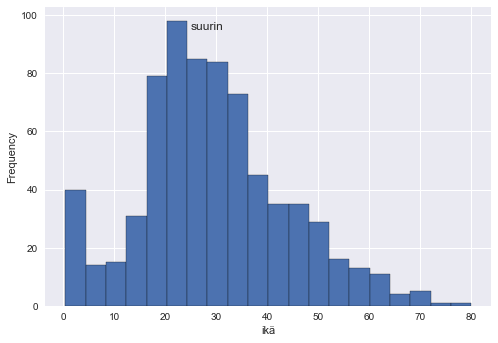

In [165]:

df['Age'].plot.hist(20, edgecolor='black') # luokkien määrä, palkkien reunan väri
plt.xlabel('ikä')
plt.annotate('suurin',(25,95))  # tällä saadaan lisättyä tekstiä kaavioon
plt.show()

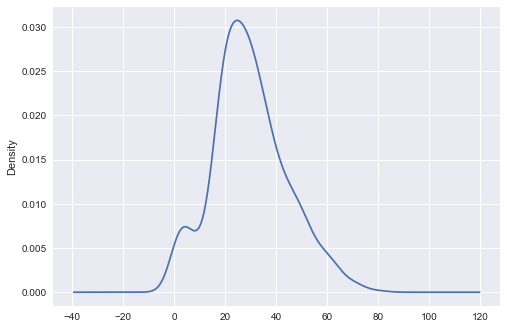

In [295]:

df['Age'].plot.density()

plt.show()

<a id="6"></a>
# Seaborn-kirjasto
Seaborn on matplotlib-kirjaston päälle rakennettu kirjasto, joka tarjoaa helpon käyttöliittymän monien muuten vaikeasti laadittavien kaavioiden laatimiseen.

[speksi](https://seaborn.pydata.org/)

Seaborn-kirjastosta löytyy suunnilleen sama titanic-datasetti harjoittelua varten:

In [170]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<a id="7"></a>
### countplot
seabornin countplot tarjoaa helpon tavan lukumäärien esittämiseen:

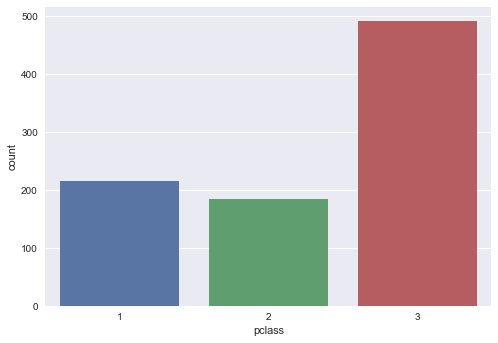

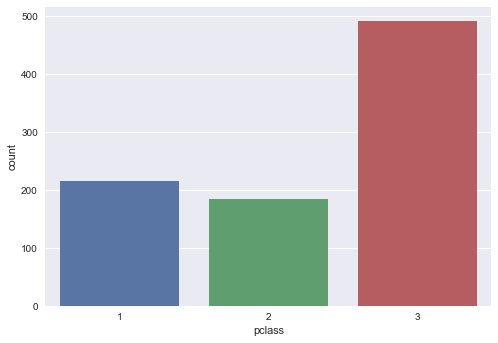

In [279]:
titanic = sns.load_dataset('titanic')
sns.countplot(x='pclass', data=titanic)
plt.show()

# toinen tapa

sns.countplot(titanic['pclass'])
plt.show()

Lukumääriä ei tarvitse siis laskea erikseen, vaan seaborn hoitaa laskennan.

Kaaviota voi muokata luonnin jälkeen tallentamalla countplotin antama Axes-objekti muuttujaan:

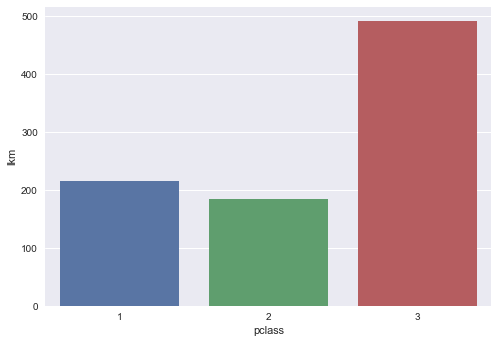

In [179]:
ax = sns.countplot(x='pclass', data=titanic)
ax.set_ylabel('lkm') # myös plt.ylabel('lkm') toimisi nykyisen kaavion muokkaamiseen
plt.show()

`hue`-parametrilla voidaan ottaa mukaan toinen  luokittelusarake:

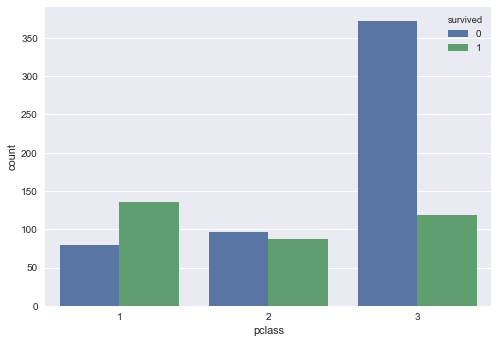

In [182]:
ax = sns.countplot(x='pclass', hue='survived', data=titanic)
plt.show()

Ja vaakapylväät saa antamalla x:n sijaan y:n.
seabornin funktioissa yleensä annetaan siis data-parametrissa käytettävä DataFrame ja x/y/hue tms. -parameterina sarakkeiden nimiä.

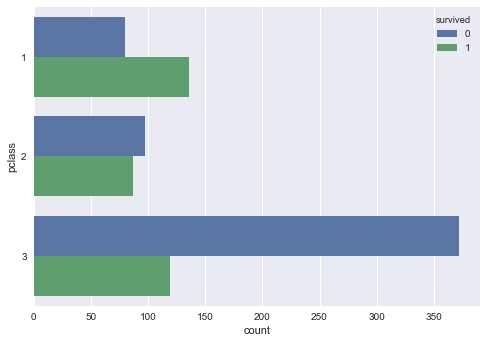

In [186]:
ax = sns.countplot(y='pclass', hue='survived', data=titanic)
plt.show()

<a id="8"></a>
### factorplot
`factorplot` tekee rinnakkaiset kaaviot "kolmannen" sarakkeen mukaan ryhmiteltynä:


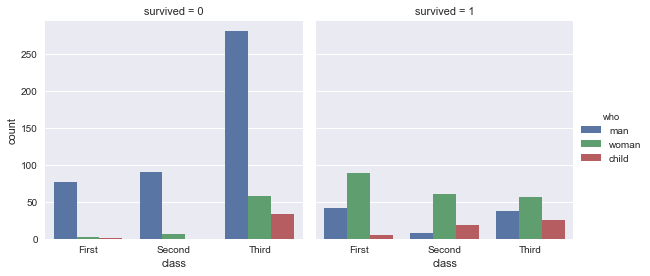

In [196]:
sns.factorplot(x='class', hue='who', data=titanic, col='survived', kind='count') # kind=count kertoo että lasketaan lukumääriä
plt.show()

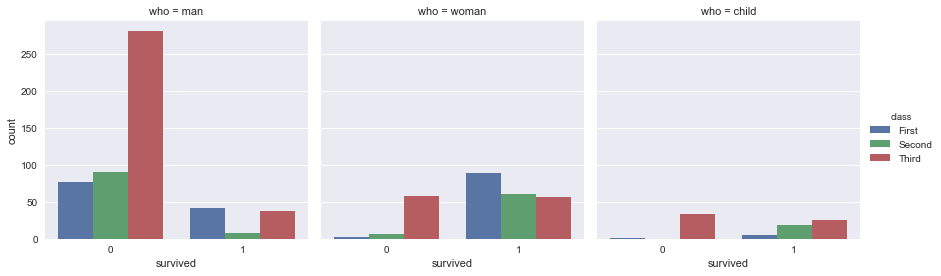

In [194]:
sns.factorplot(x='survived', hue='class', data=titanic, col='who', kind='count') 
plt.show()

<a id="9"></a>
### barplot
barplot tekee pylväskaavion, joka esittää oletuksena keskiarvot ja keskiarvojen virhemarginaalit (95% merkitsevyystasolla).

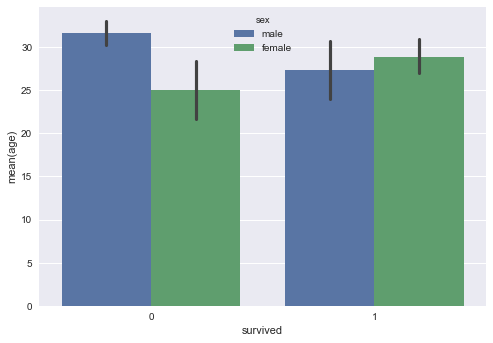

In [199]:
sns.barplot(x='survived', y='age', hue='sex', data=titanic)
plt.show()

<a id="10"></a>
### distplot
`distplot` tekee päällekkäin histogrammin ja jakaumasta estimoidun tiheysfunktion. Tälle annetaan parametrina suoraan tutkittava sarake (Series). NaN-arvot aiheuttavat tässä virheen, niinpä ne pudotetaan pois `dropna()`:lla

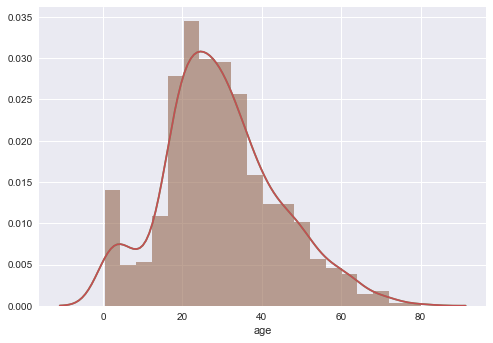

In [202]:
sns.distplot(titanic['age'].dropna())
plt.show()

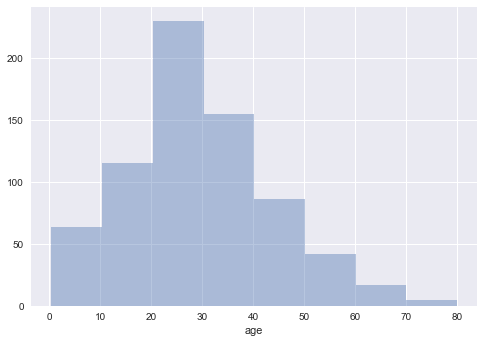

In [206]:
sns.distplot(titanic['age'].dropna(), kde=False, bins=8) # kde=False tekee vain histogrammin, hist=False tekisi vain tiheysfunktion
plt.show()

Kaksi jakaumaa samaan kaavioon saa ottamalla talteen Axes-objektin ja antamalla sen ax-parametrina:

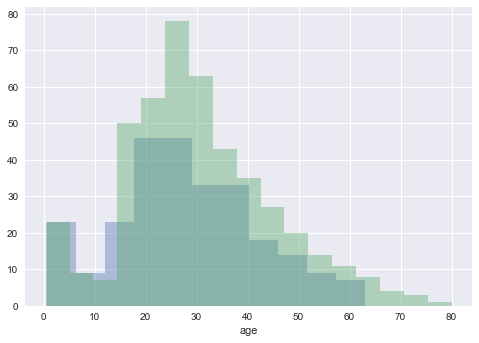

In [326]:
ax1 = sns.distplot(titanic[titanic['sex']=='female']['age'].dropna(), kde=False)
sns.distplot(titanic[titanic['sex']=='male']['age'].dropna(), kde=False, ax=ax1)
plt.show()

<a id="11"></a>
### boxplot
`boxplot` tekee ns. ruutu- ja janakaavion (box-and-whisker plot), jolla voidaan kuvata helposti numeeristen arvojen jakaumat kategorioittain. Ruuduissa on 50 % arvoista jakauman keskeltä, ja janat jatkuvat 1,5 kertaisina ruudun korkeuteen nähden ylä- ja alapuolelle. Näiden ulkopuoliset arvot piirretään poikkeavina (outliers).


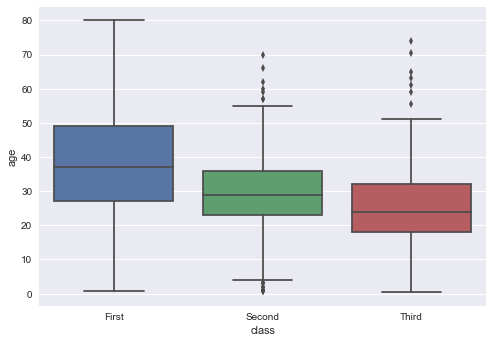

In [210]:
sns.boxplot(x='class', y='age', data=titanic)
plt.show()

<a id="12"></a>
### swarmplot
'swarmplot' kuvaa yksittäiset arvot luokittain.

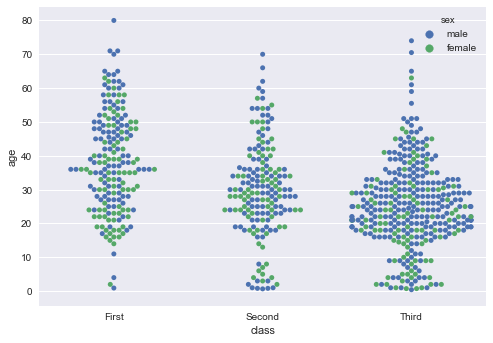

In [291]:
sns.swarmplot(x='class', y='age', hue='sex', data=titanic)
plt.show()

<a id="13"></a>
### violinplot
`violinplot` näyttää samat jatkuvina jakaumina.

In [ ]:
sns.violinplot(x='class', y='age', hue='sex',split=False,  data=titanic)
plt.show()

<a id="14"></a>
### regplot, jointplot
'regplot' määrittää kahden muuttujan välille regressiosuoran. `jointplot` lisää tähän molemmille histogrammit.

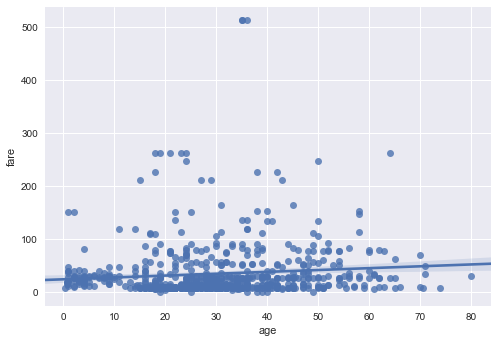

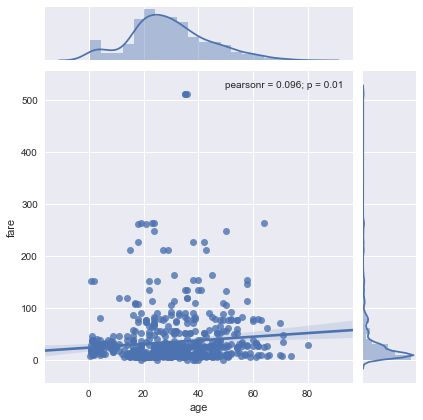

In [312]:
sns.regplot('age', 'fare', data=titanic)
plt.show()

sns.jointplot('age', 'fare', data=titanic, kind='reg')
plt.show()

<a id="15"></a>
### pairplot
`pairplot` piirtää samalla kertaa jakaumat useammasta muuttujaparista.

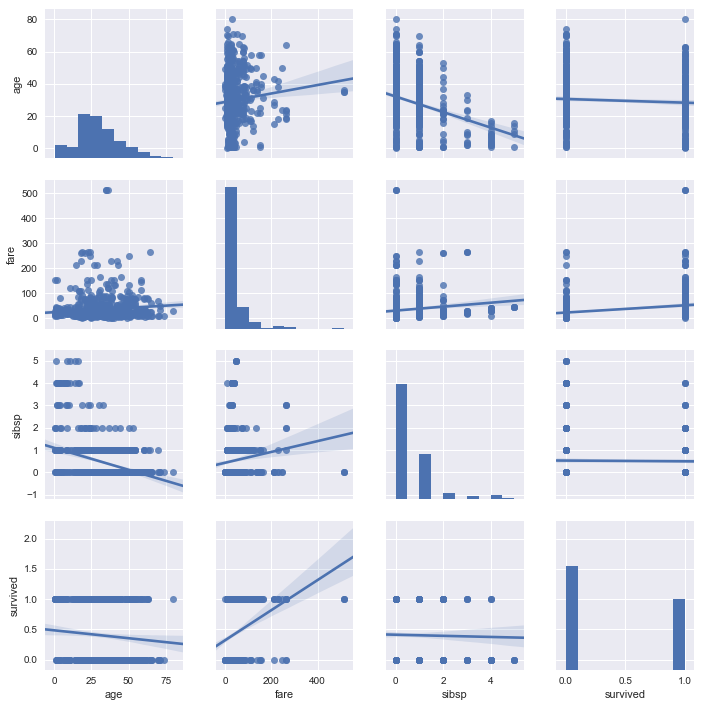

In [311]:
sns.pairplot(titanic[['age', 'fare', 'sibsp', 'survived']].dropna(), kind='reg')
plt.show()

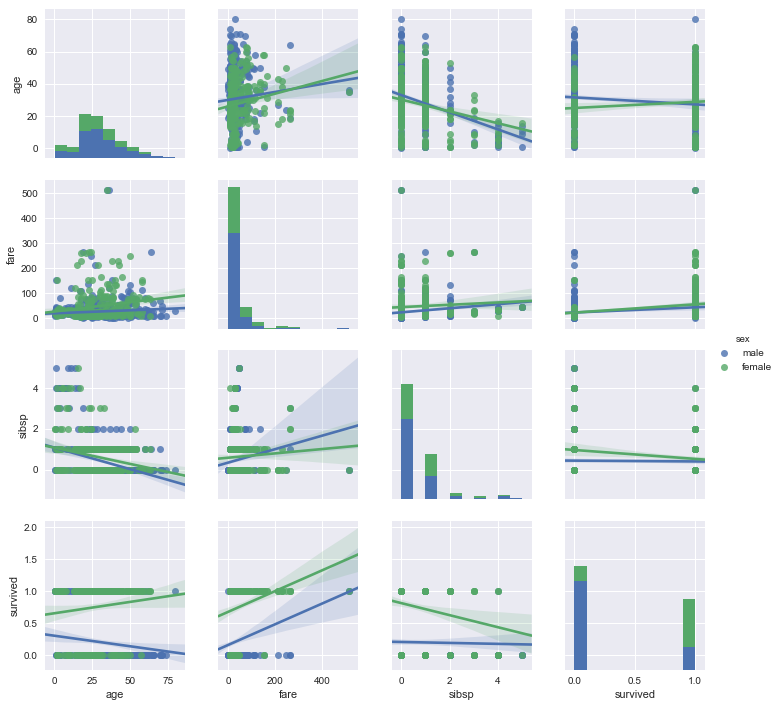

In [234]:
sns.pairplot(titanic[['age', 'fare', 'sibsp', 'survived', 'sex']].dropna(), kind='reg', hue='sex')
plt.show()

<a id="16"></a>
### Kuvioiden koko ja tallentaminen
Kuvion koon voi määrittää tuumina, oletuskoko on 6.4 x 4.8 tuumaa.

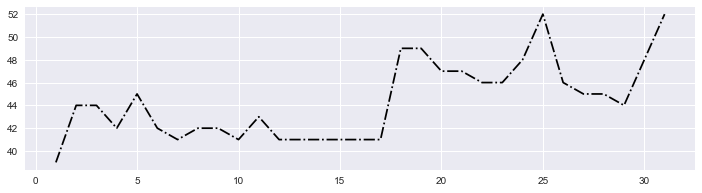

In [308]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')

plt.plot(df['Pv'],df['2018'], 'k-.') 



fig = plt.gcf()  #antaa nykyisen kuvion (current figure)
fig.set_size_inches(12, 3)

plt.show()

Kuvion voi tallentaa `savefig` -funktiolla. Jos `format`-parametria ei ole annettu, päätellään tietostomuoto tiedostopäätteestä. Useimmat ympäristöt tukevat ainakin muotoja png, pdf, ps, eps ja svg.

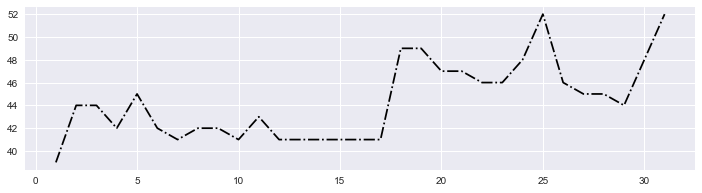

In [310]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/esim3.txt')

plt.plot(df['Pv'],df['2018'], 'k-.') 



fig = plt.gcf()  #antaa nykyisen kuvion (current figure)
fig.set_size_inches(12, 3)
plt.savefig('kuvio1.png', dpi=400)
plt.show()
